# Iterative Prisoner's Dilemma


## Description

The [Prisoner's Dilemma](https://en.wikipedia.org/wiki/Prisoner%27s_dilemma) (PD) is a classical game analyzed in game theory, which is widely used to (attempt to) model social/economical interaction. It's a "dilemma" as, if exploited to explain the emergence of altruism in human or in general animal society, it fails badly at a first glance.

The classical situation-representation of the PD is that of two prisoners whose conviction depends on their mutual cooperation. It is easier understood though if illustrated in terms of a trade-off game (closed bag exachange):

*Two people meet and exchange closed bags, with the understanding that one of them contains money, and the other contains a purchase. Either player can choose to honor the deal by putting into his or her bag what he or she agreed, or he or she can defect by handing over an empty bag.*

It is obvious that for both players the winning strategy is to NOT cooperate.

Things changes when the interaction between the two individuals is iterated, in that case a more altruist attitude (strategy) is expected to emerge. The goal of this project is to test this hypothesis.

Mathematically the PD can be expressed with very basic linear algebra. The key component is the **Payoff matrix** $M$, which quantify the reward each player gets depending on whether she cooperated or not (defect):

$$
M = 
\begin{pmatrix} 
R & S \\
T & P 
\end{pmatrix}
$$

with $T,R,S,P$ integers that satisfy the following conditions:

$$
T>R>P>S; \quad 2R > T+S
$$

for example $T=3$, $R=2$, $P=1$ and $S=0$, or  $T=5$, $R=3$, $P=2$, $S=0$. Each player choice (move) can be represented by one of the two axis in ${\rm I\!R}^2$, i.e. $u_C=\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ or $u_D=\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, where the first coordinate stands for *Cooperate* and the second for *Defect*. Being $u_1$ and $u_2$ their rewards $r_1$ and $r_2$ can be computed then as:

$$
r_1 = u_1^T M u_2
\quad
\quad
r_2 = u_2^T M u_1
$$

In an Iterative Prisoner's Dilemma (IPD), two players play prisoner's dilemma more than once in succession and they remember previous actions of their opponent and change their strategy accordingly. The winning strategy is the one which yields to a larger reward at the end of the IPD.

The strategy can be represented as a function which outputs either $u_C$ or $u_D$. Such function can depend on the opponent's history of moves, her on history of moves, on the number of moves played till that moment and so on, but it can only be based on a probability density function. Possible strategies are:

* **Nice guy**: always cooperate (the function's output is always $u_D$)
* **Bad guy**: always defect 
* **Mainly nice**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k<50$
* **Mainly bad**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k>50$
* **tit-for-tat**: start by cooperating, then repeat what the opponent has done in the previous move 

Many more and much more complex strategies can be implemented. The strategy can even change during the IPD.


## Assignments

* Implement a simple IPD between two players implementing two given strategies. Study the evolution along the tournament confronting different strategies; study the overall outcome in the different configurations. 
* Implement a multiple players IPD (MPIPD) where several strategies play against each other in a roud-robin scheme
* Iterate what done in the previous task (repeated MPIPD, rMPIPD)  by increasing the population implementing a given strategy depending on the results that strategy achieved in the previous iteration
* Implement a rMPIPD where strategies are allowed to mutate. The goal is to simulate the effect of genetic mutations and the effect of natura selection. A parameter (gene) should encode the attidue of an individual to cooperate, such gene can mutate randomly and the corresponding phenotype should compete in the MPIPD such that the best-fitted is determined.

In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import stats

# Preliminary definition

In this section we will define all constants and function needed to the assignement

#### Constants

Let's define the constants needed for the assignement

In [2]:
# Definition of the matrix of the payoff
M = np.array([[2, 0], [3, 1]])

# Definition of the two possible moves
uc = np.array([1, 0]) # collaborative move
ud = np.array([0, 1]) # non-collaborative move

# Definition of the probability for defining the two moves
probability_mainly_bad = probability_mainly_nice = 0.75

# Definition of the number of stage in the repeated game
n = 10

print('The bimatrix of the static game:')
bM = np.array([['(2,2)', '(0,3)'], ['(3,0)', '(1,1)']])
display(pd.DataFrame(bM, index=['P1 Collaboration', 'P1 Defect'], columns=['P2 Collaboration', 'P2 Defect']))

The bimatrix of the static game:


,P2 Collaboration,P2 Defect
P1 Collaboration,"(2,2)","(0,3)"
P1 Defect,"(3,0)","(1,1)"


As we can see, in a static game, the Collaboration Strategy is dominated by the Defect, players will never play a Collaborative move. There is only a Nash Equilibrium (Defect, Defect).

#### Strategies

Game theoretically speaking, this is not the formal way to define strategies. In fact in game theory all player decide in advance what move to play in every single circumstance, here we only care about what happenes on the moves' path.

In [3]:
# always collaborate 
def nice_guy(number_of_stage):
    """
    Arg: 
        number_of_stage: number of stages of the IPD
    Return:
        an array of collaborative moves with length equal to the number of stages
    """
    
    strat = uc.copy()
    return np.broadcast_to(strat, (number_of_stage, 2))

# always defect
def bad_guy(number_of_stage):
    """
    Arg: 
        number_of_stage: number of stages of the IPD
    Return:
        an array of defect moves with length equal to the number of stages
    """
    
    strat = ud.copy()
    return np.broadcast_to(strat, (number_of_stage, 2))


# defect with probability probability_mainly_nice
def mainly_nice(number_of_stage):
    """
    Arg: 
        number_of_stage: number of stages of the IPD
    Return:
        an array of random moves depending on a probability p, with length equal to the number of stages
    """
    
    strat = uc.copy()
    strat = np.broadcast_to(strat, (number_of_stage, 2)).copy()
    for i in range(number_of_stage):
        if random.random() >= probability_mainly_nice:
            strat[i, :] = ud
    return strat

# defect with probability probability_mainly_bad
def mainly_bad(number_of_stage):
    """
    Arg: 
        number_of_stage: number of stages of the IPD
    Return:
        an array of random moves depending on a probability p, with length equal to the number of stages
    """
    
    strat = ud.copy()
    strat = np.broadcast_to(strat, (number_of_stage, 2)).copy()
    for i in range(number_of_stage):
        if random.random() >= probability_mainly_bad:
            strat[i, :] = uc
    return strat

# tit for tat
def tit_for_tat(opponent_strategy, number_of_stage):
    """
    Args: 
        opponent_strategy: strategy used by the other player
        number_of_stage: number of stages of the IPD
    Return:
        a tuple of arrays of moves for player 1 and player 2
    """
    
    if opponent_strategy is tit_for_tat or opponent_strategy is grim_trigger:
        return nice_guy(number_of_stage), nice_guy(number_of_stage)
    elif opponent_strategy is nash_equilibrium:
        nice_guy_moves = nice_guy(number_of_stage)
        nash_eq_moves = nice_guy_moves.copy()
        nash_eq_moves[-1] = ud
        return nice_guy(number_of_stage), nash_eq_moves

    o = opponent_strategy(number_of_stage)
    return np.vstack((uc, o[:-1])), o

We define another interesting strategy, the **grim trigger** as:
* Start cooperating at stage 1
* At stage t >1, cooperate only if second player cooperate in all of t -1 previous stages , otherwise defect

In [4]:
def grim_trigger(opponent_strategy, number_of_stage):
    """
    Args: 
        opponent_strategy: strategy used by the other player
        number_of_stage: number of stages of the IPD
    Return:
        a tuple of arrays of moves for player 1 and player 2
    """
    
    if opponent_strategy is tit_for_tat or opponent_strategy is grim_trigger:
        return nice_guy(number_of_stage), nice_guy(number_of_stage)
    elif opponent_strategy is nash_equilibrium:
        nice_guy_moves = nice_guy(number_of_stage)
        nash_eq_moves = nice_guy_moves.copy()
        nash_eq_moves[-1] = ud
        return nice_guy(number_of_stage), nash_eq_moves
    o_moves = opponent_strategy(number_of_stage)
    my_moves = np.zeros(( number_of_stage, 2), dtype=int)
    my_moves[0] = uc
    
    for i in range (number_of_stage-1):
        if((o_moves[i] == uc).all()):
            my_moves[i+1] = uc
        else:
            my_moves[i+1:number_of_stage] = ud
            break
    
    return my_moves, o_moves

We define a function that implements the "carrot and stick" approach, and the strategy is as follow:
* Play non-NE action in the first stage (collaborate)
* Reward opponents with carrot if they collaborate (collaborate)
* Otherwise... threaten opponents with stick! (defect)

The strategy is similar to the grim trigger but it differs in the last stage where the player chooses always the Nash Equilibrium move.

In [5]:
# carrot an stick
def nash_equilibrium(opponent_strategy, number_of_stage):
    """
    Args: 
        opponent_strategy: strategy used by the other player
        number_of_stage: number of stages of the IPD
    Return:
        a tuple of arrays of moves for player 1 and player 2
    """
    if opponent_strategy is tit_for_tat or opponent_strategy is grim_trigger:
        nice_guy_moves = nice_guy(number_of_stage)
        nash_eq_moves = nice_guy_moves.copy()
        nash_eq_moves[-1] = ud
        return nash_eq_moves, nice_guy(number_of_stage)
    elif opponent_strategy is nash_equilibrium:
        nice_guy_moves = nice_guy(number_of_stage)
        nash_eq_moves = nice_guy_moves.copy()
        nash_eq_moves[-1] = ud
        return nash_eq_moves, nash_eq_moves
        
    o_moves = opponent_strategy(number_of_stage)
    my_moves = np.zeros(( number_of_stage, 2), dtype=int)
    my_moves[0] = uc
    
    for i in range (number_of_stage-1):
        if((o_moves[i] == uc).all()):
            my_moves[i+1] = uc
        else:
            my_moves[i+1:number_of_stage] = ud
            break
    my_moves[-1] = ud
    return my_moves, o_moves

Game theoretically speaking, would be more effective to model mainly_bad and mainly_nice strategy with mixed strategy.

A mixed strategy expresses the fact that a player plays a strategy with a given probability, we can easily find the payoff of this strategy looking for the expected payoff, that is the linear combination of the payoff multiplied for the probability of playing that move.  

In [6]:
def mainly_nice_mixed(number_of_stage):
    """
    Arg: 
        number_of_stage: number of stages of the IPD
    Return:
        an array of moves with mixed strategy depending on probability_mainly_nice
    """
    
    move = probability_mainly_nice * uc + (1 - probability_mainly_nice) * ud
    return np.broadcast_to(move, (number_of_stage, 2))

def mainly_bad_mixed(number_of_stage):
    """
    Arg: 
        number_of_stage: number of stages of the IPD
    Return:
        an array of moves with mixed strategy depending on probability_mainly_bad
    """
    move = probability_mainly_bad * ud + (1 - probability_mainly_bad) * uc
    return np.broadcast_to(move, (number_of_stage, 2))

#### Play

Let's define a function that computes the payoff of a IPD

In [7]:
def play (first_strat, second_strat, number_of_stage, verbose=False):
    
    """
    Arg: 
        first_strat: player 1 strategy
        second_strat: player 2 strategy
        number_of_stage: number of stages of the IPD
        verbose: if set to True it will display the evolution of the outcomes in relation to the stages
    Return:
        a tuple of total outocomes (outcome_player1, outcome_player2)
    """
    
    if first_strat is tit_for_tat or first_strat is grim_trigger or first_strat is nash_equilibrium:
        f_strat, s_strat = first_strat(second_strat, number_of_stage)
    elif second_strat is tit_for_tat or second_strat is grim_trigger or second_strat is nash_equilibrium:
        s_strat, f_strat = second_strat(first_strat, number_of_stage)
    else:
        f_strat = first_strat(number_of_stage)
        s_strat = second_strat(number_of_stage)
    out_first = []
    out_second = []
    if verbose:
        print('First player\'s strategy:\t\tSecond player\'s strategy:')
        for f_move, s_move in zip(f_strat, s_strat):
            print(f_move, '\t\t\t\t\t' +str(s_move))
        print()
        
    for f, s in zip(f_strat, s_strat):
        out_first += [f.dot(M).dot(s.T) , ]
        out_second += [s.dot(M).dot(f.T) , ]
    if verbose:
        print('The outcome of the first player is:')
        print(out_first, '\n')
        print('The outcome of the second player is:')
        print(out_second, '\n')
        print('The total outcome for the first player is:', np.array(out_first).sum())
        print('The total outcome for the second player is:', np.array(out_second).sum())
        
        # plot
        out_first_cs = np.array(out_first).cumsum() 
        out_second_cs = np.array(out_second).cumsum()
        
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.grid(visible=True)
        ax.plot( range(1, number_of_stage+1) , out_first_cs , label='player 1')
        ax.plot( range(1, number_of_stage+1) , out_second_cs , label='player 2')
        ax.legend()
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        
    return np.array(out_first).sum(), np.array(out_second).sum()

# First task

Implement a simple IPD between two players implementing two given strategies. Study the evolution along the tournament confronting different strategies; study the overall outcome in the different configurations.

Let's see what happenes if a mainly nice guy plays against a tit fot tat

First player's strategy:		Second player's strategy:
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]

The outcome of the first player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 

The outcome of the second player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 

The total outcome for the first player is: 20
The total outcome for the second player is: 20


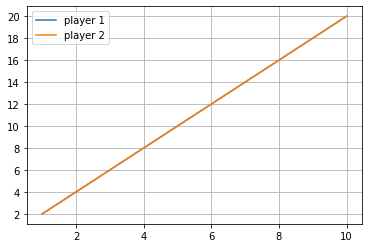

In [8]:
print('Let\'s see what happenes if a mainly nice guy plays against a tit fot tat\n')
outcome = play(mainly_nice, tit_for_tat, n, verbose=True)

As we can see in this specific total outcomes depend on the strategy adopted by the mainly nice guy, since it is not a deterministic strategy. But we can say that if the last move of the mainly nice guy is defect, the player will have a payoff grater than the opponet's one.

Let's run it a lot of time and let's see what happens

In [9]:
repetition = 1000
mainly_nice_outcome = 0
tit_for_tat_outcome = 0
for i in range(repetition):
    outs = play(mainly_nice, tit_for_tat, n)
    mainly_nice_outcome += outs[0]
    tit_for_tat_outcome += outs[1]
mainly_nice_outcome = mainly_nice_outcome / repetition
tit_for_tat_outcome = tit_for_tat_outcome / repetition
print('Mainly Nice average outcome is:', mainly_nice_outcome)
print('Tit for tat average outcome is:', tit_for_tat_outcome)

Mainly Nice average outcome is: 18.05
Tit for tat average outcome is: 17.282


And let's compare this to the total outcome allowing mixed strategy

First player's strategy:		Second player's strategy:
[0.75 0.25] 					[1. 0.]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]

The outcome of the first player is:
[2.25, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75] 

The outcome of the second player is:
[1.5, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75] 

The total outcome for the first player is: 18.0
The total outcome for the second player is: 17.25


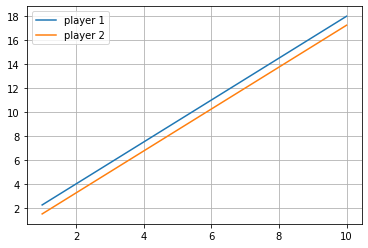

In [10]:
out = play(mainly_nice_mixed, tit_for_tat, n, verbose=True)

In order to demonstrate the correlation between mixed and pure strategies we decided to perform a Student's t-test starting by defining the **null hypothesis** $H_0$ (mixed strategies is correlated to the pure ones) and the level of significance $\alpha$ = 5%

mu = 22.5
sigma = 1.4205523464374585
sample mean = 22.493
T = 0.15582631415658146


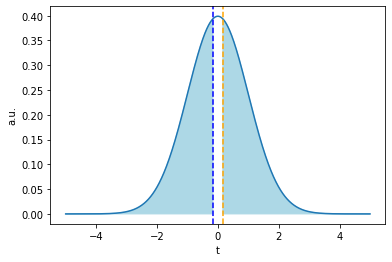

p-value = 0.8762014091628894


In [11]:
mu = play(mainly_nice_mixed, nice_guy, n, verbose=False)[0]
print("mu =", mu)

samples_size = 1000 # the size of the data sample
samples = []
for i in range(samples_size):
    p1_out = play(mainly_nice, nice_guy, n)[0]
    samples.append(p1_out)

samples = np.array(samples)
sigma = np.sqrt(np.var(samples, ddof=1))
print("sigma =", sigma)
sample_mean = np.mean(samples)
print("sample mean =", sample_mean)
T = abs((sample_mean - mu) / (sigma / np.sqrt(samples_size)))
print("T =", T)

x = np.linspace(-5, +5, 1000)
y = stats.t.pdf(x, samples_size - 1)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(-T, samples_size - 1) + (1. - stats.t.cdf(T, samples_size - 1))
print("p-value =", pvalue)

mu = 27.5
sigma = 1.3961637702194085
sample mean = 27.526
T = 0.588893802561976


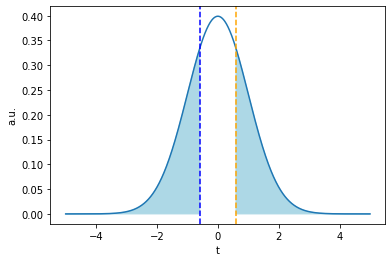

p-value = 0.5560656448593718


In [12]:
mu = play(mainly_bad_mixed, nice_guy, n, verbose=False)[0]
print("mu =", mu)

samples_size = 1000 # the size of the data sample
samples = []
for i in range(samples_size):
    p1_out = play(mainly_bad, nice_guy, n)[0]
    samples.append(p1_out)

samples = np.array(samples)
sigma = np.sqrt(np.var(samples, ddof=1))
print("sigma =", sigma)
sample_mean = np.mean(samples)
print("sample mean =", sample_mean)
T = abs((sample_mean - mu) / (sigma / np.sqrt(samples_size)))
print("T =", T)

x = np.linspace(-5, +5, 1000)
y = stats.t.pdf(x, samples_size - 1)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(-T, samples_size - 1) + (1. - stats.t.cdf(T, samples_size - 1))
print("p-value =", pvalue)

Since the p-value is not $< \alpha/2$, we accept the null hypothesis.

From now on we consider mixed strategies instead of pure ones.

Let's keep on with some interesting comparisons:
* nice guy against bad guy
* bad guy against bad guy
* tit fot tat against bad guy
* nash equilibrium against nash equilibrium
* nash equilibrium against tit for tat
* nash equilibrium against grim trigger

First player's strategy:		Second player's strategy:
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]

The outcome of the first player is:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

The outcome of the second player is:
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3] 

The total outcome for the first player is: 0
The total outcome for the second player is: 30


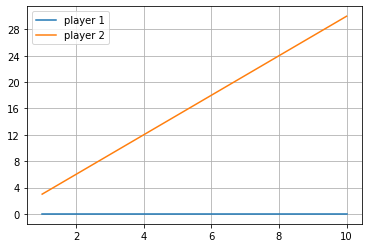

In [13]:
out = play(nice_guy, bad_guy, n, verbose=True)

First player's strategy:		Second player's strategy:
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]

The outcome of the first player is:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

The outcome of the second player is:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

The total outcome for the first player is: 10
The total outcome for the second player is: 10


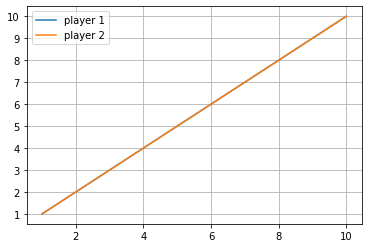

In [14]:
out = play(bad_guy, bad_guy, n, verbose=True)

First player's strategy:		Second player's strategy:
[1 0] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]

The outcome of the first player is:
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

The outcome of the second player is:
[3, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

The total outcome for the first player is: 9
The total outcome for the second player is: 12


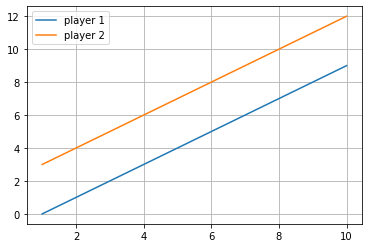

In [15]:
out = play(tit_for_tat, bad_guy, n, verbose=True)

First player's strategy:		Second player's strategy:
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[0 1] 					[0 1]

The outcome of the first player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 1] 

The outcome of the second player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 1] 

The total outcome for the first player is: 19
The total outcome for the second player is: 19


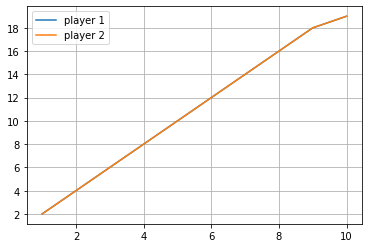

In [16]:
out = play(nash_equilibrium, nash_equilibrium, n, verbose=True)

First player's strategy:		Second player's strategy:
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[0 1] 					[1 0]

The outcome of the first player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 3] 

The outcome of the second player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 0] 

The total outcome for the first player is: 21
The total outcome for the second player is: 18


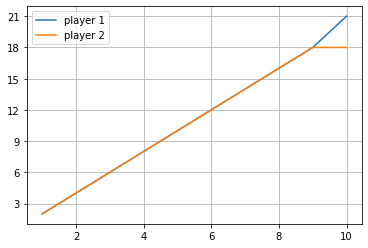

In [17]:
out = play(nash_equilibrium, tit_for_tat, n, verbose=True)

First player's strategy:		Second player's strategy:
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[0 1] 					[1 0]

The outcome of the first player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 3] 

The outcome of the second player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 0] 

The total outcome for the first player is: 21
The total outcome for the second player is: 18


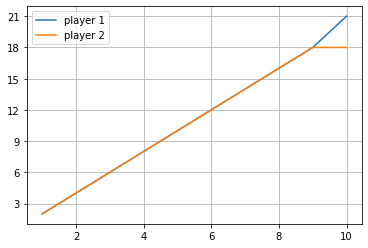

In [18]:
outcome = play( nash_equilibrium, grim_trigger, n, verbose=True)

## Conclusions

From this we can conclude that the way to achieve the best payoff is to play bad guy against nice guy, but in this configuration the nice guy achieve the lowest possible payoff, so nobody will play nice guy. 

An improvement could be playing bad guy against bad guy, but in this case both payoffs are not so high, playing tit for tat against bad guy does not improve the payoff of the first player, but allow the second player to respond with tit for tat.

Finally, as we know from the theory we can say that the SPE using the 'carrot and stick' approach is the best strategy to play for both player, it consists on collaborate for each round but not the last one, after the last stage after there is no punishment aviable, so the best choice for all the player is acting in a selfish way and play NE. 

# Second task

Implement a multiple players IPD (MPIPD) where several strategies play against each other in a roud-robin scheme

#### Preliminary definition

Let's define the round robin scheme

In [19]:
def round_robin(strategies, labels, number_of_stage, verbose=False):
    """
    Round Robin algorithm, every round the players fight against each other
    Args:
        strategies (array of function): All the strategies (players) in the game.
        labels (array of string): The labels (names) of the strategies.
        number_of_stage (int): The number of iterations that a single match has to do.
        verbose (bool): If true print all the details of the game.
    Returns:
        payoffs (Dataframe): The payoff of each fight for every strategies (players).
        winners (Dataframe): Indicate with an arrow the winner, with a circle if the result is tie.
        
    """
    
    payoffs = np.empty((len(strategies),len(strategies)), dtype=object)
    winners = np.empty((len(strategies),len(strategies)), dtype=str)
    for i, (f_strat, f_label) in enumerate(zip(strategies, labels)):
        for j, (s_strat, s_label) in enumerate(zip(strategies, labels)):
            if verbose:
                print('First player is', f_label, 'second player is', s_label)
            outcome = play(f_strat, s_strat, number_of_stage, verbose=verbose)
            if outcome[0] == outcome[1]:
                winners[i, j] = '\u25EF' # It is a circle
                if verbose:
                    print('\nPlayers draw\n\n')
            elif outcome[0] > outcome[1]:
                winners[i, j] = '\u2B60' # It is a left arrow
                if verbose:
                    print('\nPlayer', f_label, 'wins\n\n')
            else:
                winners[i,j] = '\u2B61' # It is a up arrow
                if verbose:
                    print('\nPlayer', s_label, 'wins\n\n')
            payoffs[i, j] = outcome
    payoffs = pd.DataFrame(payoffs, columns = labels , index= labels)
    winners = pd.DataFrame(winners, columns = labels , index= labels)
    return payoffs, winners

def simplified_round_robin(strategies, labels, number_of_stage):
    """Round Robin algorithm, a simplest verion
    Args:
        strategies (array of function): All the strategies (players) in the game.
        labels (array of string): The labels (names) of the strategies.
        number_of_stage (int): The number of iterations that a single match has to do.
    Returns:
        payoffs (Dataframe): The payoff of each fight for every strategies (players).
    """
    payoffs = np.empty((len(strategies),len(strategies)), dtype=object)
    for i, f_strat in enumerate(strategies):
        for j, s_strat in enumerate(strategies):
            outcome = play(f_strat, s_strat, number_of_stage)
            payoffs[i, j] = outcome[0]
    payoffs = pd.DataFrame(payoffs, columns = labels , index= labels)
    return payoffs

## Output

Let's see what round_robin produces, if you want to see the whole process set verbose = True.

Whatch out, inside the touple the first payoff is the payoff of the player on the left.

In [20]:
strategies_2nd = [nice_guy, bad_guy, mainly_nice_mixed, mainly_bad_mixed, tit_for_tat, grim_trigger, nash_equilibrium]
strategy_labels_2nd =['Nice Guy','Bad Guy','Mainly Nice Mixed', 'Mainly Bad Mixed', 'Tit for Tat', 'Grim Trigger', 'nash_equilibrium']

payoffs, winners = round_robin(strategies_2nd, strategy_labels_2nd, n, verbose=False)

display(payoffs)
display(winners)

,Nice Guy,Bad Guy,Mainly Nice Mixed,Mainly Bad Mixed,Tit for Tat,Grim Trigger,nash_equilibrium
Nice Guy,"(20, 20)","(0, 30)","(15.0, 22.5)","(5.0, 27.5)","(20, 20)","(20, 20)","(18, 21)"
Bad Guy,"(30, 0)","(10, 10)","(25.0, 2.5)","(15.0, 7.5)","(12, 9)","(12, 9)","(12, 9)"
Mainly Nice Mixed,"(22.5, 15.0)","(2.5, 25.0)","(17.5, 17.5)","(7.5, 22.5)","(18.0, 17.25)","(4.5, 24.0)","(4.5, 24.0)"
Mainly Bad Mixed,"(27.5, 5.0)","(7.5, 15.0)","(22.5, 7.5)","(12.5, 12.5)","(14.0, 11.75)","(9.5, 14.0)","(9.5, 14.0)"
Tit for Tat,"(20, 20)","(9, 12)","(17.25, 18.0)","(11.75, 14.0)","(20, 20)","(20, 20)","(18, 21)"
Grim Trigger,"(20, 20)","(9, 12)","(24.0, 4.5)","(14.0, 9.5)","(20, 20)","(20, 20)","(18, 21)"
nash_equilibrium,"(21, 18)","(9, 12)","(24.0, 4.5)","(14.0, 9.5)","(21, 18)","(21, 18)","(19, 19)"


,Nice Guy,Bad Guy,Mainly Nice Mixed,Mainly Bad Mixed,Tit for Tat,Grim Trigger,nash_equilibrium
Nice Guy,◯,⭡,⭡,⭡,◯,◯,⭡
Bad Guy,⭠,◯,⭠,⭠,⭠,⭠,⭠
Mainly Nice Mixed,⭠,⭡,◯,⭡,⭠,⭡,⭡
Mainly Bad Mixed,⭠,⭡,⭠,◯,⭠,⭡,⭡
Tit for Tat,◯,⭡,⭡,⭡,◯,◯,⭡
Grim Trigger,◯,⭡,⭠,⭠,◯,◯,⭡
nash_equilibrium,⭠,⭡,⭠,⭠,⭠,⭠,◯


# Third task

Iterate what done in the previous task (repeated MPIPD, rMPIPD) by increasing the population implementing a given strategy depending on the results that strategy achieved in the previous iteration.

# Filippo's Solution
I made what described in this [this video](https://www.youtube.com/watch?v=uRTtlpD_U54), I only used the normalized sum of the payoffs obtained by a type as replication chance

In [21]:
from matplotlib import ticker

strategies = [nice_guy, bad_guy, mainly_nice_mixed, mainly_bad_mixed, tit_for_tat, grim_trigger]
strategy_labels =['Nice Guy','Bad Guy','Mainly Nice Mixed', 'Mainly Bad Mixed', 'Tit for Tat', 'Grim Trigger']
payoffs = simplified_round_robin(strategies, strategy_labels, n)

def propagate(population, round, strategy_labels, use_death_ratio=False, use_crowding=False):
    """Simulate the propagation of a given population according to 
    a replication chance given by the score obtained by the population 
    and an optional death rateo and crowding coefficient

        Args:
            population (DataFrame): contains the population in the past rounds,
                has the same format of the output
            round (int): the index of the round that has to be propagated.
            strategy_labels (list of string): the name of the strategies
            use_death_ratio (bool): if True a element dies with 10% probability
            use_crowding (bool):  if True a crowding factor is considered

        Returns:
            A DataFrame containing the propagated population
    """
    death_ratio = 0.1
    crowding_coefficient = 0.001
    replication_chance = np.empty((len(strategy_labels)), dtype=float)
    for i, first_strategy in enumerate(strategy_labels):
        total_payoff = 0
        for j, second_strategy in enumerate(strategy_labels):
            total_payoff += payoffs.loc[first_strategy, second_strategy]*population.iloc[round, j]
        total_payoff = population.iloc[round, i]*total_payoff
        replication_chance[i] = total_payoff
    replication_chance = replication_chance/replication_chance.sum()
    next_round = np.empty((1,len(strategy_labels)), dtype=int)
    total_number = population.iloc[round, :].to_numpy().sum()
    for i, (p_n, r_c) in enumerate(zip(population.iloc[round, :], replication_chance)):
        multiplier = r_c
        if use_death_ratio:
            multiplier-=death_ratio
        if use_crowding:
            multiplier -= (crowding_coefficient*total_number)
        next_round[0, i] = p_n + (multiplier *p_n).round()
    next_round = pd.DataFrame(next_round, columns=strategy_labels, index=['round '+str(round+1)])
    return population.append(next_round)

def print_nice_graph(population_df):
    """Prints a cumulative graph representing different evolution of species.
    
        Args:
            population_df (DataFrame): a dataframe containing the evolution of
            the species has the same format as the output of propagate
    """
    nice = population_df.loc[:, 'Nice Guy'].to_numpy()
    bad = population_df.loc[:, 'Bad Guy'].to_numpy()
    m_nice = population_df.loc[:, 'Mainly Nice Mixed'].to_numpy()
    m_bad = population_df.loc[:, 'Mainly Bad Mixed'].to_numpy()
    tft = population_df.loc[:, 'Tit for Tat'].to_numpy()
    grim = population_df.loc[:, 'Grim Trigger'].to_numpy()
    fig, ax = plt.subplots(1, figsize=(8,8))
    ax.set_title('Cumulative population over time')
    ax.get_xaxis().set_major_locator(ticker.FixedLocator([x for x in range(len(nice)) if (x%5 == 0 or x == 0)]))
    ax.get_xaxis().set_minor_locator(ticker.MultipleLocator(1))
    ax.set_xticklabels(['round '+str(x) for x in range(len(nice)) if (x%5 == 0 or x == 0)])
    ax.plot(nice)
    nice_area = ax.fill_between(np.arange(len(nice)),np.zeros(len(nice)), nice, alpha=0.2)
    ax.plot(nice + bad)
    bad_area = ax.fill_between(np.arange(len(nice)),nice, nice+ bad, alpha=0.2)
    ax.plot(nice + bad + m_nice)
    mnice_area = ax.fill_between(np.arange(len(nice)), nice+ bad, nice + bad + m_nice, alpha=0.2)
    ax.plot(nice + bad + m_nice+m_bad)
    mbad_area = ax.fill_between(np.arange(len(nice)),nice+ bad+m_nice, nice + bad + m_nice+m_bad, alpha=0.2)
    ax.plot(nice + bad + m_nice+m_bad+ tft)
    tft_area = ax.fill_between(np.arange(len(nice)), nice+ bad+m_nice+m_bad, nice + bad + m_nice+m_bad+tft, alpha=0.2)
    ax.plot(nice + bad + m_nice+m_bad+ tft + grim)
    grim_area = ax.fill_between(np.arange(len(nice)), nice+ bad+m_nice+m_bad+tft, nice + bad + m_nice+m_bad+tft+grim, alpha=0.2)
    areas =[nice_area, bad_area, mnice_area, mbad_area, tft_area, grim_area]
    names = ['Nice Guy', 'Bad Guy', 'Mainly Nice Mixed', 'Mainly Bad Mixed', 'Tit for Tat', 'Grim Trigger']
    for a, l in zip(areas, names):
        a.set_label(l)
    ax.legend(loc='upper left')
    plt.show()

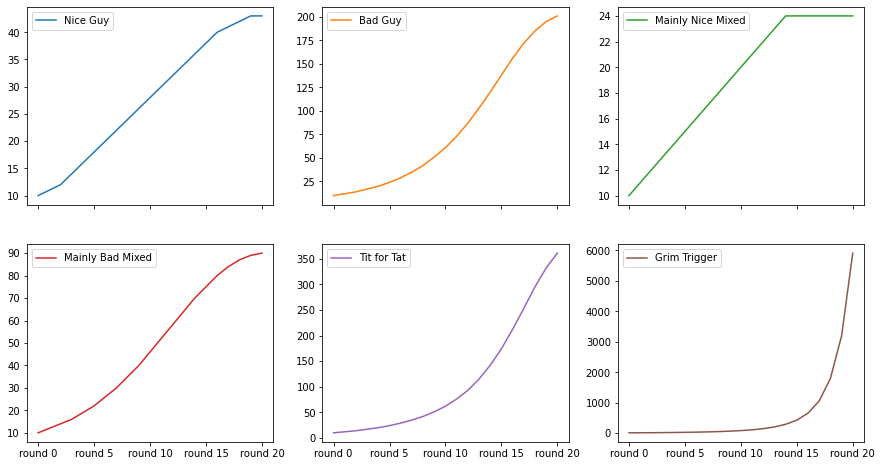

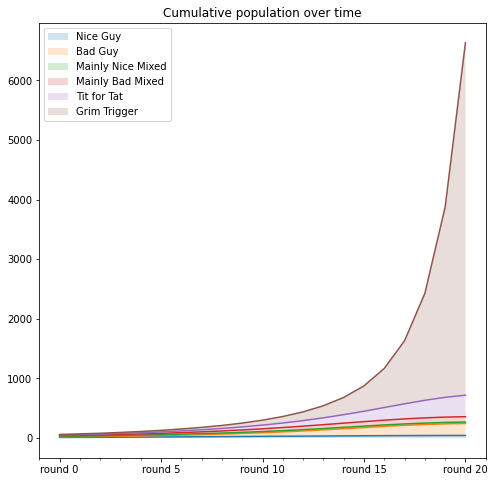

In [22]:
# Only replication (too many iterations will overflow this)
population_df = pd.DataFrame(10*np.ones((1,len(strategies)), dtype=int), columns=strategy_labels, index=['round 0'])
for i in range(20):
    population_df = propagate(population_df, i, strategy_labels)
population_df.plot(subplots=True, layout=(2,3), figsize=(15, 8))
print_nice_graph(population_df)

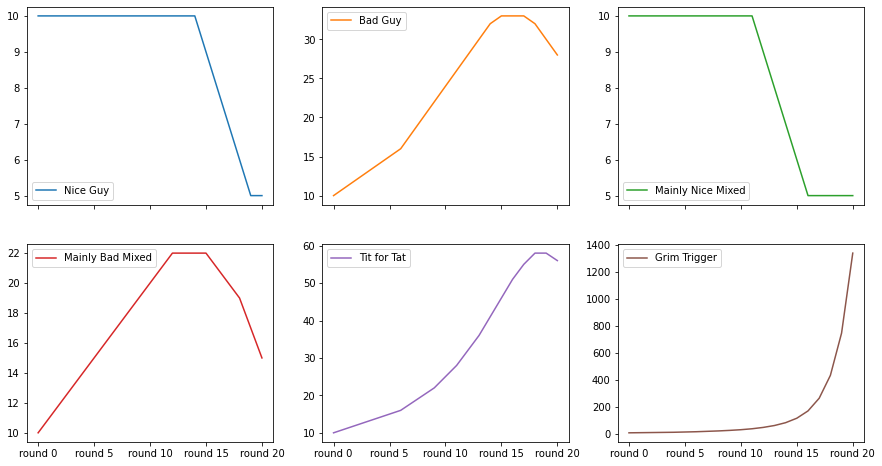

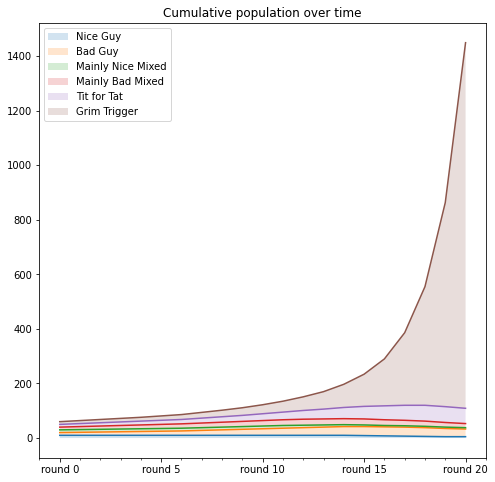

In [23]:
# With death ratio (too many iterations will overflow this)
population_df = pd.DataFrame(10*np.ones((1,len(strategies)), dtype=int), columns=strategy_labels, index=['round 0'])
for i in range(20):
    population_df = propagate(population_df, i, strategy_labels, use_death_ratio=True)
population_df.plot(subplots=True, layout=(2,3), figsize=(15, 8))
print_nice_graph(population_df)

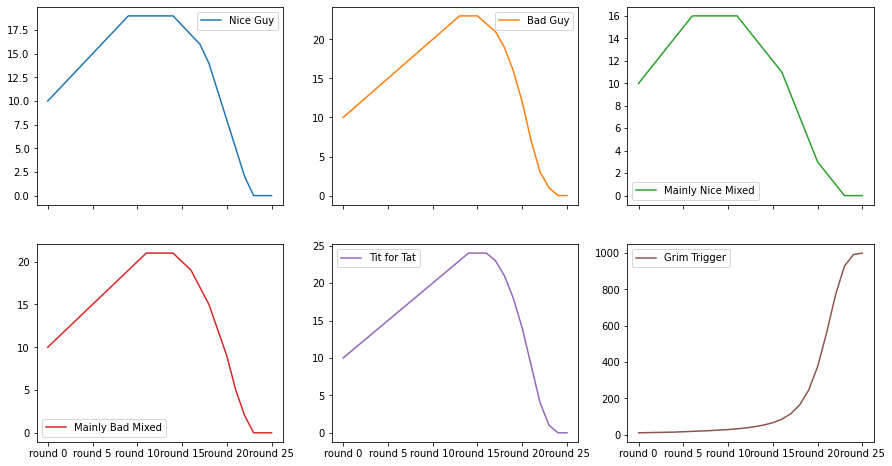

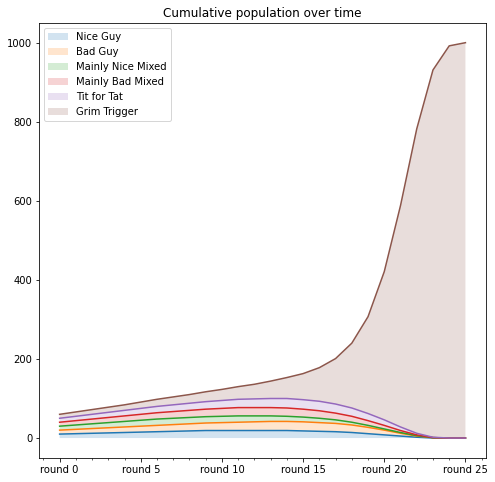

In [24]:
# With crowding
population_df = pd.DataFrame(10*np.ones((1,len(strategies)), dtype=int), columns=strategy_labels, index=['round 0'])
for i in range(25):
    population_df = propagate(population_df, i, strategy_labels, use_crowding=True)
population_df.plot(subplots=True, layout=(2,3), figsize=(15, 8))
print_nice_graph(population_df)

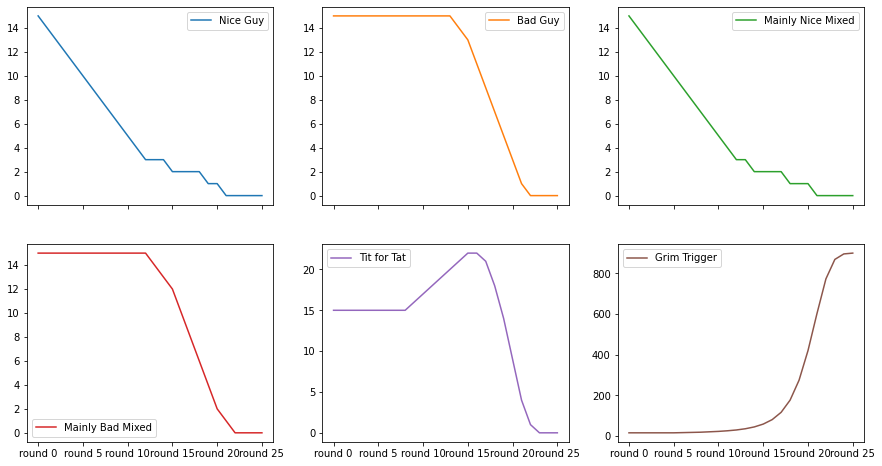

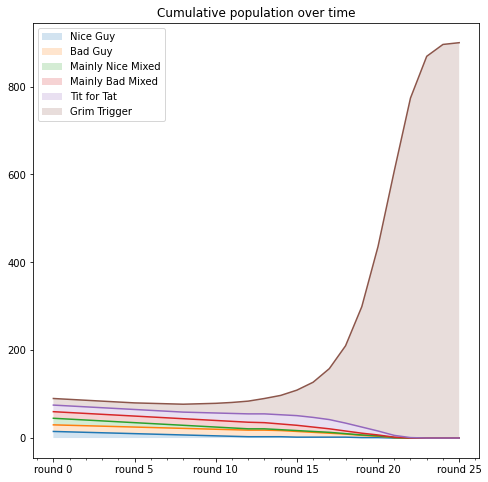

In [25]:
# With death ratio and crowding all equal start
population_df = pd.DataFrame(15*np.ones((1,len(strategies)), dtype=int), columns=strategy_labels, index=['round 0'])
for i in range(25):
    population_df = propagate(population_df, i, strategy_labels, use_death_ratio=True, use_crowding=True)
population_df.plot(subplots=True, layout=(2,3), figsize=(15, 8))
print_nice_graph(population_df)

## Nicola's Solution

In [26]:
from collections import Counter

strategies = [nice_guy, bad_guy, mainly_nice_mixed, mainly_bad_mixed, tit_for_tat, nash_equilibrium]
strategy_labels =['Nice Guy','Bad Guy','Mainly Nice Mixed', 'Mainly Bad Mixed', 'Tit for Tat', 'Nash equilibrium']

# return an array of strategies, each array's element represent a player that decide to use that strategy
# strategies are initially set random
def get_random_population(population_size):
    population = []
    for i in range(population_size):
        r_index = random.randint(0, len(strategies)-1)
        population.append(strategies[r_index])
    
    return population 
def display_occurrences(population):
    occurrences = dict(Counter([i.__name__ for i in population]))
    df = pd.DataFrame(occurrences, index=[0])
    display(df)
    
def best_response(opponent_strategy):
    payoffs, _ = round_robin(strategies, strategy_labels, n, verbose=False)
    opponent_label = strategy_labels[strategies.index(opponent_strategy)]
    # print(payoffs[opponent_label])
    my_outcomes = [x[0] for x in payoffs[opponent_label]]
    my_best_outcome_index = my_outcomes.index(max(my_outcomes))
    
    return strategies[my_best_outcome_index] 


population_size = 1000
population = get_random_population(population_size)

# display occurrences
print("initial population :")
display_occurrences(population)

n_iterations = 2000
for i in range(n_iterations):
    # get two random players
    r_index_1 =random.randint(0, population_size-1)
    r_index_2 =random.randint(0, population_size-1)
    
    p1_strategy = population[r_index_1]
    p2_strategy = population[r_index_2]
    # print(p1_strategy.__name__ , " vs ", p2_strategy.__name__)
    outcome = play( p1_strategy, p2_strategy, n, verbose=False)
    # print("player 1 gets ", outcome[0])
    # print("player 2 gets ", outcome[1])
    
    # players are selfish, they try always to improve their own outcome
    # try to improve own outcome by changing strategy depending on opponent strategy
    population[r_index_1] = best_response(p2_strategy)
    # print(p1_strategy.__name__, " chenged to: ", population[r_index_1].__name__)
    population[r_index_2] = best_response(p1_strategy)
    # print(p2_strategy.__name__, " chenged to: ", population[r_index_2].__name__)
    
# display occurrences
print("final population :")
display_occurrences(population)

initial population :


,mainly_nice_mixed,nice_guy,tit_for_tat,bad_guy,mainly_bad_mixed,nash_equilibrium
0,151,179,151,181,152,186


final population :


,bad_guy,nash_equilibrium,mainly_nice_mixed,nice_guy,mainly_bad_mixed,tit_for_tat
0,653,336,5,4,1,1


## Marcos's Solution

## Implementation with random propagation

In [27]:
strat_dict = {
    'nice_guy' : nice_guy,
    'bad_guy' : bad_guy,
    'mainly_nice_mixed' : mainly_nice_mixed,
    'mainly_bad_mixed' : mainly_bad_mixed,
    'tit_for_tat' : tit_for_tat,
    'nash_equilibrium' : nash_equilibrium
}
strategies = [nice_guy, bad_guy, mainly_nice_mixed, mainly_bad_mixed, tit_for_tat, nash_equilibrium]
strategy_labels =['Nice Guy','Bad Guy','Mainly Nice Mixed', 'Mainly Bad Mixed', 'Tit for Tat', 'Nash equilibrium']

size = len(strategies)
best = 0.0
propagated = 0
cont = 0

for i in range(0, size+1):
    payoffs, winners = round_robin(strategies, strategy_labels, n, verbose=False)
    #We calculate the total payoff of each strategie, to decide which one will propagate
    sum_up = np.empty(len(strategies), dtype=float)
    payoffs["Sum"] = payoffs.sum(axis=1)
    for j in range(0, len(payoffs["Sum"])):
        try:
            l = list(payoffs.at[strategy_labels[j] ,"Sum"])
            payoffs.at[strategy_labels[j], "Sum"] = sum(l[0])
        except:
            if sum(list(payoffs.at[strategy_labels[j] ,"Sum"])) < 300:
                payoffs.at[strategy_labels[j], "Sum"] = sum(list(payoffs.at[strategy_labels[j] ,"Sum"]))
                print(payoffs)
    #We compare the results of each strategy and select the strategy with the most impact on the population
    for t in enumerate(list(payoffs["Sum"])):
        if t[1] > best:
            best = t[1]
            row = payoffs.iloc[t[0]]
    #This propagates in a random manner
    while (propagated == 0):
        prop = random.randint(0, len(strategies)-1)
        prop_strat = row.name.replace(" ", "_").lower()
        func = strat_dict[prop_strat]
        if (func != strategies[prop]):
            strategies[prop] = func
            strategy_labels[prop] = row.name
            propagated = 1
        if cont > len(strategies):
            propagated = 1
        cont += 1
    propagated = 0
    cont = 0
display(payoffs)
display(winners)

                       Nice Guy      Bad Guy Mainly Nice Mixed  \
Nice Guy               (20, 20)      (0, 30)      (15.0, 22.5)   
Bad Guy                 (30, 0)     (10, 10)       (25.0, 2.5)   
Mainly Nice Mixed  (22.5, 15.0)  (2.5, 25.0)      (17.5, 17.5)   
Mainly Bad Mixed    (27.5, 5.0)  (7.5, 15.0)       (22.5, 7.5)   
Tit for Tat            (20, 20)      (9, 12)     (17.25, 18.0)   
Nash equilibrium       (21, 18)      (9, 12)       (24.0, 4.5)   

                  Mainly Bad Mixed    Tit for Tat Nash equilibrium  \
Nice Guy               (5.0, 27.5)       (20, 20)         (18, 21)   
Bad Guy                (15.0, 7.5)        (12, 9)          (12, 9)   
Mainly Nice Mixed      (7.5, 22.5)  (18.0, 17.25)      (4.5, 24.0)   
Mainly Bad Mixed      (12.5, 12.5)  (14.0, 11.75)      (9.5, 14.0)   
Tit for Tat          (11.75, 14.0)       (20, 20)         (18, 21)   
Nash equilibrium       (14.0, 9.5)       (21, 18)         (19, 19)   

                                              

,Nice Guy,Nice Guy,Mainly Nice Mixed,Nice Guy,Nice Guy,Nice Guy,Sum
Nice Guy,"(20, 20)","(20, 20)","(15.0, 22.5)","(20, 20)","(20, 20)","(20, 20)",237.5
Nice Guy,"(20, 20)","(20, 20)","(15.0, 22.5)","(20, 20)","(20, 20)","(20, 20)",237.5
Mainly Nice Mixed,"(22.5, 15.0)","(22.5, 15.0)","(17.5, 17.5)","(22.5, 15.0)","(22.5, 15.0)","(22.5, 15.0)",222.5
Nice Guy,"(20, 20)","(20, 20)","(15.0, 22.5)","(20, 20)","(20, 20)","(20, 20)",237.5
Nice Guy,"(20, 20)","(20, 20)","(15.0, 22.5)","(20, 20)","(20, 20)","(20, 20)",237.5
Nice Guy,"(20, 20)","(20, 20)","(15.0, 22.5)","(20, 20)","(20, 20)","(20, 20)",237.5


,Nice Guy,Nice Guy,Mainly Nice Mixed,Nice Guy,Nice Guy,Nice Guy
Nice Guy,◯,◯,⭡,◯,◯,◯
Nice Guy,◯,◯,⭡,◯,◯,◯
Mainly Nice Mixed,⭠,⭠,◯,⭠,⭠,⭠
Nice Guy,◯,◯,⭡,◯,◯,◯
Nice Guy,◯,◯,⭡,◯,◯,◯
Nice Guy,◯,◯,⭡,◯,◯,◯


## Implementation without random propagation

In [28]:
strat_dict = {
    'nice_guy' : nice_guy,
    'bad_guy' : bad_guy,
    'mainly_nice_mixed' : mainly_nice_mixed,
    'mainly_bad_mixed' : mainly_bad_mixed,
    'tit_for_tat' : tit_for_tat,
    'nash_equilibrium' : nash_equilibrium
}
strategies = [nice_guy, bad_guy, mainly_nice_mixed, mainly_bad_mixed, tit_for_tat, nash_equilibrium]
strategy_labels =['Nice Guy','Bad Guy','Mainly Nice Mixed', 'Mainly Bad Mixed', 'Tit for Tat', 'Nash equilibrium']

size = len(strategies)
best = 0.0
propagated = 0
cont = 0

for i in range(0, size+1):
    payoffs, winners = round_robin(strategies, strategy_labels, n, verbose=False)
    #We calculate the total payoff of each strategie, to decide which one will propagate
    sum_up = np.empty(len(strategies), dtype=float)
    payoffs["Sum"] = payoffs.sum(axis=1)
    for j in range(0, len(payoffs["Sum"])):
        try:
            l = list(payoffs.at[strategy_labels[j] ,"Sum"])
            payoffs.at[strategy_labels[j], "Sum"] = sum(l[0])
        except:
            if sum(list(payoffs.at[strategy_labels[j] ,"Sum"])) < 300:
                payoffs.at[strategy_labels[j], "Sum"] = sum(list(payoffs.at[strategy_labels[j] ,"Sum"]))
                print(payoffs)
    #We compare the results of each strategy and select the strategy with the most impact on the population
    for t in enumerate(list(payoffs["Sum"])):
        if t[1] > best:
            best = t[1]
            row = payoffs.iloc[t[0]]
    #This will find the next player with different strategy and propagate
    while (propagated == 0):
        prop_strat = row.name.replace(" ", "_").lower()
        func = strat_dict[prop_strat]
        if (func != strategies[cont]):
            strategies[cont] = func
            strategy_labels[cont] = row.name
            propagated = 1
        if cont >= len(strategies)-1:
            propagated = 1
        cont += 1
    propagated = 0
    cont = 0
display(payoffs)
display(winners)

                       Nice Guy      Bad Guy Mainly Nice Mixed  \
Nice Guy               (20, 20)      (0, 30)      (15.0, 22.5)   
Bad Guy                 (30, 0)     (10, 10)       (25.0, 2.5)   
Mainly Nice Mixed  (22.5, 15.0)  (2.5, 25.0)      (17.5, 17.5)   
Mainly Bad Mixed    (27.5, 5.0)  (7.5, 15.0)       (22.5, 7.5)   
Tit for Tat            (20, 20)      (9, 12)     (17.25, 18.0)   
Nash equilibrium       (21, 18)      (9, 12)       (24.0, 4.5)   

                  Mainly Bad Mixed    Tit for Tat Nash equilibrium  \
Nice Guy               (5.0, 27.5)       (20, 20)         (18, 21)   
Bad Guy                (15.0, 7.5)        (12, 9)          (12, 9)   
Mainly Nice Mixed      (7.5, 22.5)  (18.0, 17.25)      (4.5, 24.0)   
Mainly Bad Mixed      (12.5, 12.5)  (14.0, 11.75)      (9.5, 14.0)   
Tit for Tat          (11.75, 14.0)       (20, 20)         (18, 21)   
Nash equilibrium       (14.0, 9.5)       (21, 18)         (19, 19)   

                                              

,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Sum
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240


,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Nice Guy
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯


## Fourth task

Implement a rMPIPD where strategies are allowed to mutate. The goal is to simulate the effect of genetic mutations and the effect of natura selection. A parameter (gene) should encode the attidue of an individual to cooperate, such gene can mutate randomly and the corresponding phenotype should compete in the MPIPD such that the best-fitted is determined.

I'm implementing what shown in [this video](https://www.youtube.com/watch?v=0ZGbIKd0XrM&t)

In [29]:
# They are ordered from the nicest to the baddest
strategies = [nice_guy, mainly_nice_mixed, tit_for_tat, grim_trigger, mainly_bad_mixed, bad_guy]
strategy_labels = ["Nice Guy", "Mainly Nice Mixed", "Tit for Tat", "Grim Trigger", "Mainly Bad Mixed", "Bad Guy"]
round_rob = simplified_round_robin(strategies, strategy_labels, n)

population_df = pd.DataFrame(10*np.ones((1,len(strategies)), dtype=int), columns=strategy_labels, index=['round 0'])
mutation_chance = 0.005

def plot_population(population, n_col):
    """"Plots the population at each round in a sort of petri dish
    
        Args:
            population (DataFrame): containing the number of people 
                per specie at each round, as the format of the output 
                of propagate_natura_selection
            n_col (int): number of graph in a row of the figure
        """
    n_plots = len(population.index)
    n_row = n_plots//n_col + 1
    colors = ["r","g","y","b","m","c"]
    ax = np.array([])
    fig, ax = plt.subplots(n_row, n_col, figsize=(18, 14))
    rows = 0
    columns = 0
    for i in range(n_row*n_col):
        cmap = 0
        if (i % n_col) == 0 and i!=0: 
            rows += 1
            columns = 0
        if (i < n_plots):
            ax[rows,columns].set_title('round '+str(i))
            for strat in strategy_labels:
                N = population.at['round '+str(i),strat]
                X, Y = np.random.rand(2, N)
                ax[rows,columns].scatter(X,Y,c=colors[cmap], edgecolors='none',  alpha=0.5, label=strat)
                ax[rows,columns].axis('off')
                cmap+=1
        else:
            if(i==n_row*n_col-1):
                for strat in strategy_labels:
                    ax[rows,columns].scatter([],[],c=colors[cmap], edgecolors='none',  alpha=0.5, label=strat)
                    cmap+=1
                ax[rows,columns].legend()
            ax[rows,columns].axis('off')
        columns+=1
    plt.show()              
    
   

def die(next_round, number, index):
    """Calculate the new population if a number $number of elements of 
    the specie $index die

        Args:
            next_round (Array): an array containing the partial number 
                of element in the next round
            number (int): the number of element that has to die during 
                this round
            index (int): the specie of the element that has to die
        
        Return:
            Array containing the new partial value of the number of 
            element per specie in the next round
    """
    next_round[0, index] -= number
    if next_round[0, index] < 0:
        next_round[0, index] = 0
    return next_round

def survive(next_round, number, index):
    """Calculate the new population if a number $number of elements 
    of the specie $index survive

        Args:
            next_round (Array): an array containing the partial 
                number of element in the next round
            number (int): the number of element that has to survive 
                during this round
            index (int): the specie of the element that has to survive
        
        Return:
            Array containing the new partial value of the number of 
                element per specie in the next round
    """
    return next_round

def duplicate(next_round, number, index):
    """Calculate the new population if a number $number of elements 
    of the specie $index duplicates, the element produced can mutate 
    with a probability $mutation_chance

        Args:
            next_round (Array): an array containing the partial 
                number of element in the next round
            number (int): the number of element that has to duplicate
                 during this round
            index (int): the specie of the element that has to duplicate
        
        Return:
            Array containing the new partial value of the number
                 of element per specie in the next round
    """
    random_mutation = np.random.random(number)
    unique, counts = np.unique((random_mutation < mutation_chance), return_counts=True)
    left_mutation = 0
    if True in unique:
        left_mutation = dict(zip(unique, counts))[True]
    unique, counts = np.unique((random_mutation > (1-mutation_chance)), return_counts=True)
    right_mutation = 0
    if True in unique:
        right_mutation = dict(zip(unique, counts))[True]
    if index == 0:
        next_round[0,1] += right_mutation
        next_round[0,0] += (number - right_mutation)
    elif index == 5: #BE CAREFULL
        next_round[0,4] += left_mutation
        next_round[0,5] += (number - left_mutation)
    else:
        next_round[0,index-1] += left_mutation
        next_round[0,index+1] += right_mutation
        next_round[0,index] += (number - right_mutation - left_mutation)
    return next_round

def create_function_dataframe(alive, crowding, calc_survive_thresh, calc_dup_thresh):
    """Creates a DataFrame containing the function that each 
    element (in the row) must do if it plays against another 
    element (in the column)
    
        Args:
            alive (list of string): list of species still alive
            crowding (int): total number of people in the stage
            calc_survive_trash (fun): function describing 
                how to calculate the survive trashold ie the minimum 
                payoff needed to survive
            calc_dup_trash (fun): function describing how 
                to calculate the duplicate trashold ie the minimum 
                payoff needed to duplicate.
            
        Returns:
            DataFrame containing the function that each 
                element (in the row) must do if it plays 
                against another element (in the column)"""
    crowding_factor = 500
    function_df = round_rob.copy()
    m = function_df.loc[alive, alive].to_numpy().mean()
    crowding_rate = crowding/crowding_factor
    survive_trashold = calc_survive_thresh(m, crowding_rate)
    duplicate_trashold = calc_dup_thresh(m, crowding_rate)
    mask_die = round_rob<=survive_trashold
    mask_survive = (round_rob>survive_trashold) & (round_rob <= duplicate_trashold)
    mask_duplicate = round_rob>duplicate_trashold
    function_df[mask_die]=die
    function_df[mask_survive]=survive
    function_df[mask_duplicate]=duplicate
    return function_df

def propagate_natura_selection(population, round, calc_survive_thresh, calc_dup_thresh):
    """Propagates the effect of natura selection for a round, 
        starting at round $round, using $calc_survive_thresh 
        and $calc_dup_thresh as function to calculate the 
        survive and duplicate threshold
    
        Args: 
            population (DataFrame): contains the initial 
                status of the population
            round (int): the number of the round that has to 
                be propagated
            calc_survive_trash (fun): function describing 
                how to calculate the survive trashold ie the 
                minimum payoff needed to survive
            calc_dup_trash (fun): function describing how
                to calculate the duplicate trashold ie the minimum 
                payoff needed to duplicate.
            
        Returns:
            Dataframe containing the initial status and 
            its propagation for one round"""
    alive = []
    for i, stra in enumerate(population.columns):
        if population.iloc[round, i] > 0:
            alive += [stra, ]
    if len(alive)==0:
        next_round = np.expand_dims(population.iloc[round, :].to_numpy(), axis=0).copy()
        next_round = pd.DataFrame(next_round, columns=strategy_labels, index=['round '+str(round+1)])
        return population.append(next_round)
    function_df = create_function_dataframe(alive, population.iloc[round, :].sum(), calc_survive_thresh, calc_dup_thresh)
    next_round = np.expand_dims(population.iloc[round, :].to_numpy(), axis=0).copy()
    for strat_index, strategy_first in enumerate(population.columns):
        for strategy_second in population.columns:
            number = population.iloc[round, strat_index].copy()
            next_round = function_df.loc[strategy_first, strategy_second](next_round, number, strat_index)
    next_round = pd.DataFrame(next_round, columns=strategy_labels, index=['round '+str(round+1)])
    return population.append(next_round)

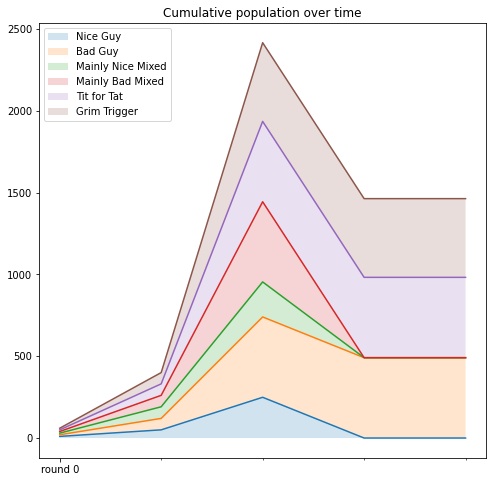

,Nice Guy,Mainly Nice Mixed,Tit for Tat,Grim Trigger,Mainly Bad Mixed,Bad Guy
round 0,10,10,10,10,10,10
round 1,50,71,70,69,70,70
round 2,249,214,491,481,490,491
round 3,0,0,491,481,0,491
round 4,0,0,491,481,0,491


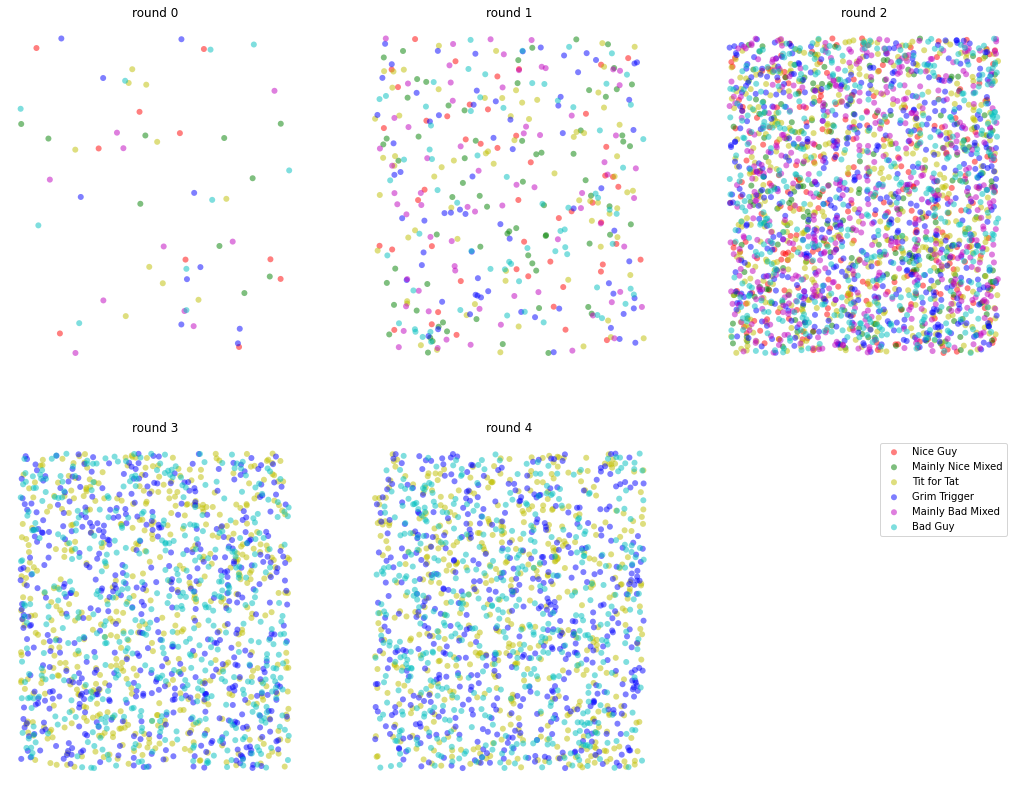

In [30]:
population_df = pd.DataFrame(10*np.ones((1,len(strategies)), dtype=int), columns=strategy_labels, index=['round 0'])

def survive_th1(mean_playoff, crowding_rate):
    """Calculates the survive trashold ie the minimum 
    payoff needed to survive halving the mean_playoff"""
    return 0.5*mean_playoff
def duplicate_th1(mean_playoff, crowding_rate):
    """Calculates the duplicate trashold ie the minimum 
    payoff needed to duplicate halving the mean_playoff 
    and multiplying for the square of the crowding rate"""
    return 0.5*mean_playoff*crowding_rate**2


for i in range(4):
    population_df = propagate_natura_selection(population_df, i,survive_th1,duplicate_th1)
print_nice_graph(population_df)
display(population_df)

#Plot population
plot_population(population_df, 3)

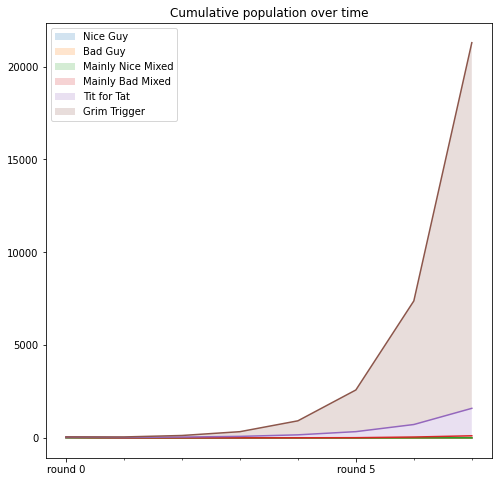

,Nice Guy,Mainly Nice Mixed,Tit for Tat,Grim Trigger,Mainly Bad Mixed,Bad Guy
round 0,10,10,10,10,10,10
round 1,10,0,20,29,0,0
round 2,10,0,39,85,3,0
round 3,10,0,79,253,0,0
round 4,10,1,158,755,3,0
round 5,10,0,325,2244,9,0
round 6,10,8,674,6655,36,0
round 7,10,4,1478,19688,106,1


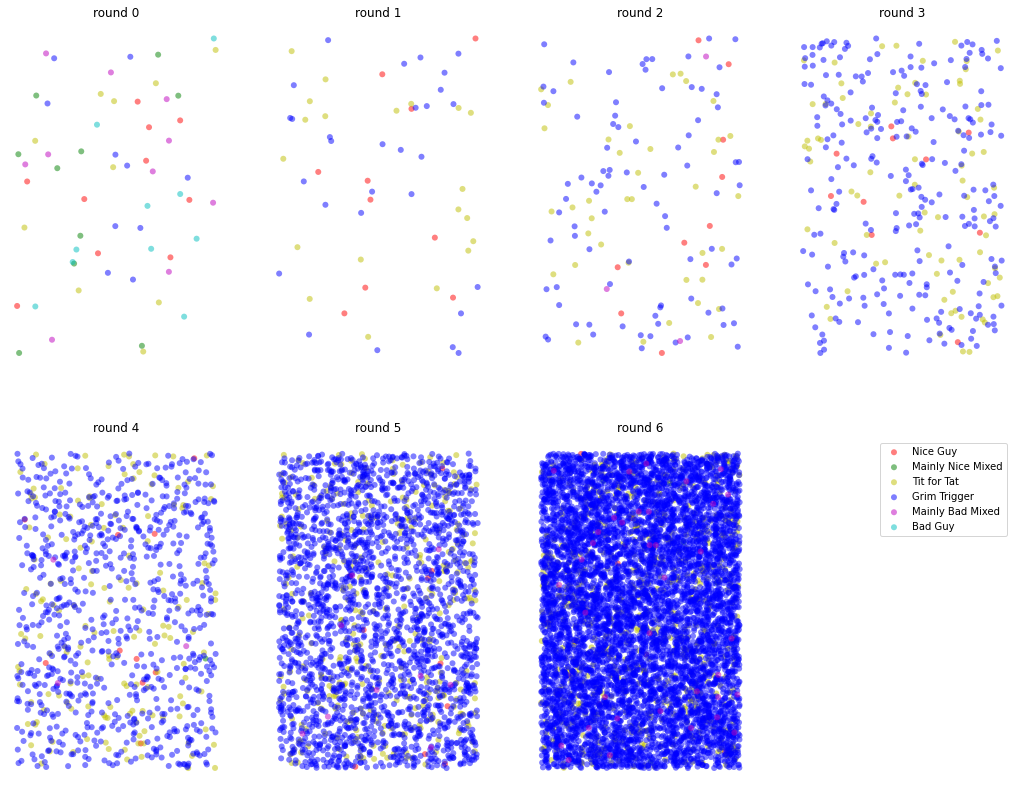

In [31]:
population_df = pd.DataFrame(10*np.ones((1,len(strategies)), dtype=int), columns=strategy_labels, index=['round 0'])

def survive_th2(mean_playoff, crowding_rate):
    """Calculates the survive trashold ie the minimum 
    payoff needed to survive returning a fixed value"""
    return 15
def duplicate_th2(mean_playoff, crowding_rate):
    """Calculates the duplicate trashold ie the minimum 
    payoff needed to duplicate returning a fixed value"""
    return 19.5


for i in range(7):
    population_df = propagate_natura_selection(population_df, i,survive_th2,duplicate_th2)
print_nice_graph(population_df)
display(population_df)

#Plot population
plot_population(population_df.iloc[0:7, :], 4)

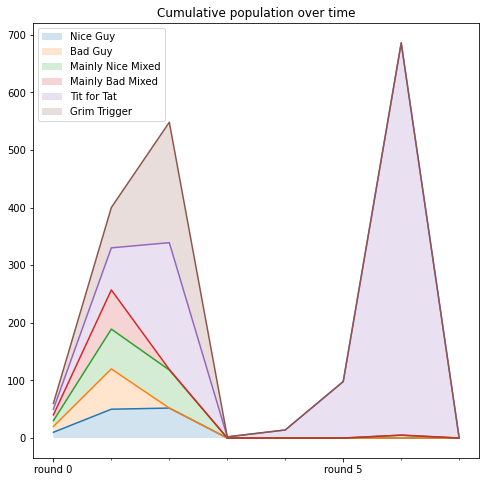

,Nice Guy,Mainly Nice Mixed,Tit for Tat,Grim Trigger,Mainly Bad Mixed,Bad Guy
round 0,10,10,10,10,10,10
round 1,50,69,73,70,68,70
round 2,52,66,220,209,1,0
round 3,0,0,2,0,0,0
round 4,0,0,14,0,0,0
round 5,0,0,98,0,0,0
round 6,0,5,680,1,0,0
round 7,0,0,0,0,0,0


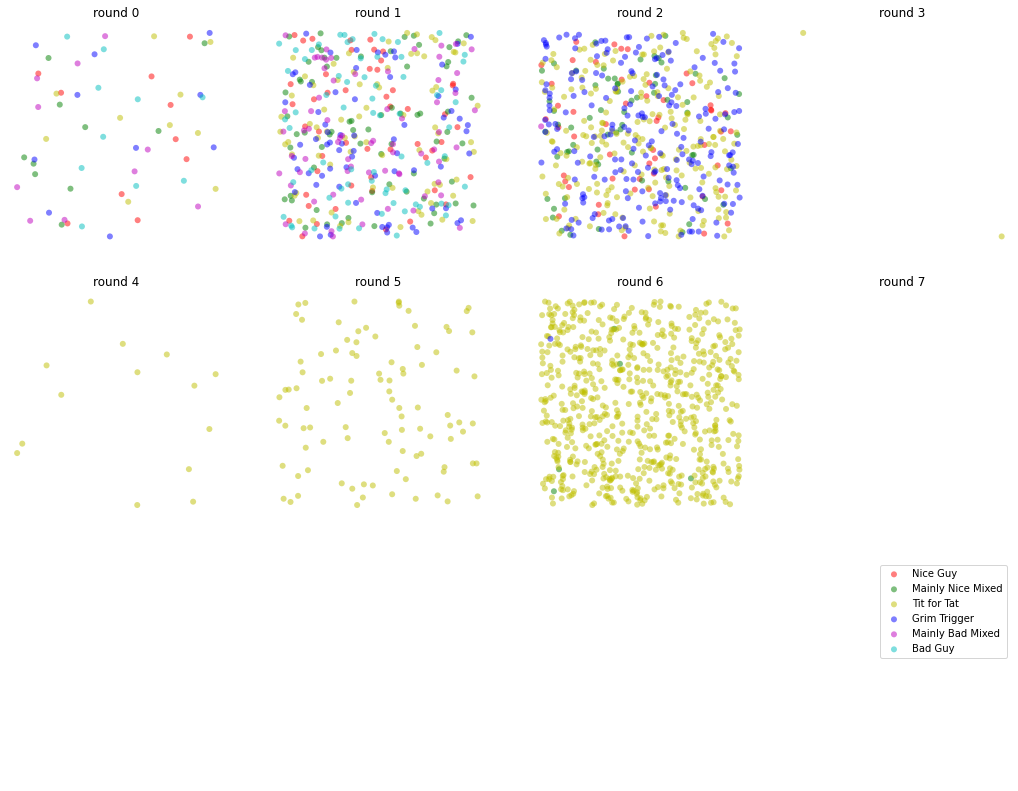

In [32]:
population_df = pd.DataFrame(10*np.ones((1,len(strategies)), dtype=int), columns=strategy_labels, index=['round 0'])

def survive_th3(mean_playoff, crowding_rate):
    """Calculates the survive trashold ie the minimum payoff 
    needed to survive returning a fixed value"""
    return 15
def duplicate_th3(mean_playoff, crowding_rate):
    """Calculates the duplicate trashold ie the minimum payoff 
    needed to duplicate returning a fixed value multiplied for 
    the crowding rate"""
    return 19.5*crowding_rate


for i in range(7):
    population_df = propagate_natura_selection(population_df, i,survive_th3,duplicate_th3)
print_nice_graph(population_df)
display(population_df)

#Plot population
plot_population(population_df, 4)

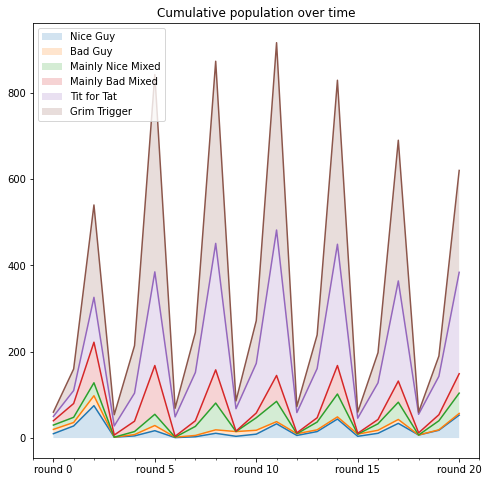

In [52]:
population_df = pd.DataFrame(10*np.ones((1,len(strategies)), dtype=int), columns=strategy_labels, index=['round 0'])

def survive_th4(mean_playoff, crowding_rate):
    """Calculates the survive trashold ie the minimum payoff 
    needed to survive returning a fixed value"""
    return 15
def duplicate_th4(mean_playoff, crowding_rate):
    """Calculates the duplicate trashold ie the minimum payoff 
    needed to duplicate returning a fixed value depending on 
    the crowding rate"""
    if crowding_rate < 0.5:
        return 12
    if crowding_rate < 0.8:
        return 13
    return 20

mutation_chance = 0.1
for i in range(20):
    population_df = propagate_natura_selection(population_df, i,survive_th4,duplicate_th4)
print_nice_graph(population_df)